<a href="https://colab.research.google.com/github/juan-scholarium/pycon2020/blob/main/pycon2020-cat_dog_panda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning vs End to end learning

Dataset from Kaggle

In [ ]:
!nvidia-smi

Fri Oct  9 00:55:11 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import xception
from tensorflow.keras import metrics, losses, optimizers, layers

from sklearn.metrics import classification_report

import os
import numpy as np

from matplotlib import pyplot as plt
plt.style.use("dark_background")

In [ ]:
!ls "drive/My Drive/dataset/"

 advertising-data
 ai_face_detection
 aptos2019_balance_set
 aptos2019_balance_setplt-resnet50-acc-gavg.png
 aptos2019_balance_setplt-resnet50-acc-with-AUG.png
 aptos2019_balance_setplt-resnet50-acc-with-moreAUG.png
 aptos2019_balance_setplt-resnet50-loss-gavg.png
 aptos2019_balance_setplt-resnet50-loss-with-AUG.png
 aptos2019_balance_setplt-resnet50-loss-with-moreAUG.png
 aptos2019-blindness-detection
 cifar
 corona-ita
 daspro-1617
'data analytics'
 diabetic-retinopathy
 dog-cat-panda
 fashionmnist
 kaggle.json
 novel-corona-virus-2019-dataset
 pima-indians-diabetes.csv
 pokemon
 retail-sales
 tabel-nilai-logistic
 xview1
 xview2


In [ ]:
base_dir = "drive/My Drive/dataset/dog-cat-panda"

In [ ]:
!ls "drive/My Drive/dataset/dog-cat-panda"

animals  images


In [ ]:
train_dir = os.path.join(base_dir, "animals")
train_dir

'drive/My Drive/dataset/dog-cat-panda/animals'

In [ ]:
image_shape = (299, 299, 3)
batch_size = 32

In [ ]:
train_datagen = image.ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.9, 1.1],
    shear_range=0.2,
    zoom_range=[0.9, 1.1],
    horizontal_flip=True,
    data_format="channels_last",
    validation_split=0.2
)

validation_datagen = image.ImageDataGenerator(
    validation_split=0.2
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_shape[:2],
    class_mode="categorical",
    batch_size=batch_size,
    subset="training"
)

validation_generator = validation_datagen.flow_from_directory(
    train_dir,
    target_size=image_shape[:2],
    class_mode="categorical",
    batch_size=batch_size,
    subset="validation"
)

Found 2407 images belonging to 3 classes.
Found 601 images belonging to 3 classes.


In [ ]:
my_metrics = [
    metrics.CategoricalAccuracy(),
    metrics.Precision(),
    metrics.Recall()
]

# Check Dataset

In [ ]:
train_generator[0][0].shape

(32, 299, 299, 3)

In [ ]:
image_idx = train_generator.index_array[1]
train_generator.labels[image_idx]

1

In [ ]:
fname = train_generator.filenames[image_idx]
fname

'dogs/dogs_00818.jpg'

In [ ]:
train_images_7, train_labels_7 = train_generator[7]
print(train_images_7.shape)
print(train_labels_7.shape)

(32, 299, 299, 3)
(32, 3)


<function matplotlib.pyplot.show>

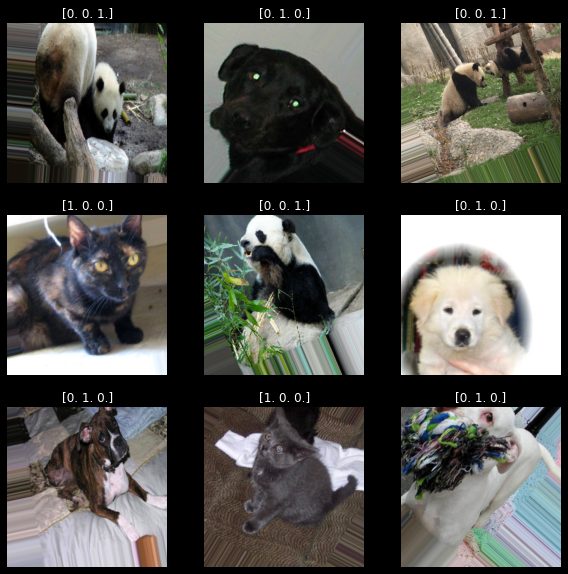

In [ ]:
plt.figure(figsize=(10, 10))

for idx in range(9):
    ax = plt.subplot(3, 3, idx + 1)
    plt.imshow(image.array_to_img(train_images_7[idx]))
    plt.title(str(train_labels_7[idx]))
    plt.axis("off")

plt.show

# End to end learning

In [ ]:
conv_base = xception.Xception(
    include_top=False,
    weights=None,
    input_shape = image_shape
)

conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
input_layer = keras.Input(shape=image_shape)
x = xception.preprocess_input(input_layer)
x = conv_base(x, training=True)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.3)(x)
output_layer = layers.Dense(3, activation="softmax")(x)

model = keras.Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
tf_op_layer_RealDiv_1 (Tenso [(None, 299, 299, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub_1 (TensorFlo [(None, 299, 299, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

In [ ]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss=losses.CategoricalCrossentropy(),
    metrics=my_metrics
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
)

# change batch size with smaller number if error

Epoch 1/20
76/76 [==============================] - 97s 1s/step - loss: 0.8937 - categorical_accuracy: 0.6536 - precision: 0.6972 - recall: 0.5841 - val_loss: 0.8063 - val_categorical_accuracy: 0.5973 - val_precision: 0.6235 - val_recall: 0.5125
Epoch 2/20
76/76 [==============================] - 96s 1s/step - loss: 0.7478 - categorical_accuracy: 0.6228 - precision: 0.6668 - recall: 0.5081 - val_loss: 0.6922 - val_categorical_accuracy: 0.5907 - val_precision: 0.6194 - val_recall: 0.5524
Epoch 3/20
76/76 [==============================] - 96s 1s/step - loss: 0.6826 - categorical_accuracy: 0.6381 - precision: 0.6797 - recall: 0.5580 - val_loss: 0.6265 - val_categorical_accuracy: 0.6772 - val_precision: 0.6954 - val_recall: 0.6040
Epoch 4/20
76/76 [==============================] - 96s 1s/step - loss: 0.6469 - categorical_accuracy: 0.6556 - precision: 0.6763 - recall: 0.5713 - val_loss: 0.6454 - val_categorical_accuracy: 0.6755 - val_precision: 0.7054 - val_recall: 0.6057
Epoch 5/20
76/76

In [ ]:
model.save("drive/My Drive/dataset/dog-cat-panda/models/xception-endtoend.h5")

## Evaluate Model

In [ ]:
model.evaluate(validation_generator, verbose=1)

19/19 [==============================] - 5s 260ms/step - loss: 0.4933 - categorical_accuracy: 0.7471 - precision: 0.7556 - recall: 0.7354


[0.4933498501777649,
 0.7470881938934326,
 0.7555555701255798,
 0.7354409098625183]

In [ ]:
y_true = list()

for idx in range(601):
    img_idx = validation_generator.index_array[idx]
    y_true.append(validation_generator.labels[img_idx])

In [ ]:
y_true[:10]

[0, 2, 2, 0, 0, 0, 1, 1, 2, 1]

In [ ]:
y_pred_prob = model.predict(validation_generator)
y_pred = list()

for idx in range(len(y_pred_prob)):
    y_pred.append(np.argmax(y_pred_prob[idx]))

In [ ]:
y_pred[:10]

[0, 2, 2, 1, 0, 1, 1, 0, 2, 0]

In [ ]:
print(classification_report(y_true, y_pred, target_names=["cat", "dog", "panda"]))

              precision    recall  f1-score   support

         cat       0.62      0.85      0.72       201
         dog       0.70      0.48      0.57       200
       panda       0.97      0.93      0.95       200

    accuracy                           0.75       601
   macro avg       0.76      0.75      0.75       601
weighted avg       0.76      0.75      0.75       601



# Transfer learning

In [ ]:
conv_base = xception.Xception(
    include_top=False,
    weights="imagenet",
    input_shape = image_shape
)
conv_base.trainable = False
conv_base.summary()

83689472/83683744 [==============================] - 3s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________

In [ ]:
input_layer = keras.Input(shape=image_shape)
x = xception.preprocess_input(input_layer)
x = conv_base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.3)(x)
output_layer = layers.Dense(3, activation="softmax")(x)

model = keras.Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 299, 299, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 299, 299, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dropout (Dropout)            (None, 256)              

In [ ]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss=losses.CategoricalCrossentropy(),
    metrics=my_metrics
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
)

Epoch 1/20
76/76 [==============================] - 1385s 18s/step - loss: 0.0864 - categorical_accuracy: 0.9742 - precision: 0.9802 - recall: 0.9659 - val_loss: 0.0369 - val_categorical_accuracy: 0.9884 - val_precision: 0.9884 - val_recall: 0.9884
Epoch 2/20
76/76 [==============================] - 68s 897ms/step - loss: 0.0472 - categorical_accuracy: 0.9830 - precision: 0.9838 - recall: 0.9830 - val_loss: 0.0281 - val_categorical_accuracy: 0.9884 - val_precision: 0.9900 - val_recall: 0.9884
Epoch 3/20
76/76 [==============================] - 68s 897ms/step - loss: 0.0374 - categorical_accuracy: 0.9867 - precision: 0.9871 - recall: 0.9855 - val_loss: 0.0487 - val_categorical_accuracy: 0.9884 - val_precision: 0.9884 - val_recall: 0.9884
Epoch 4/20
76/76 [==============================] - 68s 899ms/step - loss: 0.0215 - categorical_accuracy: 0.9942 - precision: 0.9946 - recall: 0.9938 - val_loss: 0.0429 - val_categorical_accuracy: 0.9884 - val_precision: 0.9884 - val_recall: 0.9884
Epoc

In [ ]:
model.save("drive/My Drive/dataset/dog-cat-panda/models/xception-transfer.h5")

## Evaluate Model

In [ ]:
model.metrics_names

['loss', 'categorical_accuracy', 'precision', 'recall']

In [ ]:
model.evaluate(validation_generator, verbose=1)

19/19 [==============================] - 4s 227ms/step - loss: 0.0472 - categorical_accuracy: 0.9900 - precision: 0.9900 - recall: 0.9900


[0.04721936210989952,
 0.9900166392326355,
 0.9900166392326355,
 0.9900166392326355]

In [ ]:
y_true = list()
for idx in range(601):
    img_idx = validation_generator.index_array[idx]
    y_true.append(validation_generator.labels[img_idx])

In [ ]:
y_true[:10]

[0, 1, 1, 1, 1, 2, 2, 1, 0, 1]

In [ ]:
y_pred_prob = model.predict(validation_generator)
y_pred = list()

for idx in range(len(y_pred_prob)):
    y_pred.append(np.argmax(y_pred_prob[idx]))

In [ ]:
y_pred[:10]

[0, 1, 1, 1, 1, 2, 2, 1, 0, 1]

In [ ]:
print(classification_report(y_true, y_pred, target_names=["cat", "dog", "panda"]))

              precision    recall  f1-score   support

         cat       0.99      0.98      0.99       201
         dog       0.98      1.00      0.99       200
       panda       1.00      0.99      0.99       200

    accuracy                           0.99       601
   macro avg       0.99      0.99      0.99       601
weighted avg       0.99      0.99      0.99       601



# Fine Tuning

In [ ]:
conv_base.trainable = True

In [ ]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-6),
    loss=losses.CategoricalCrossentropy(),
    metrics=my_metrics
)

model.summary()

In [ ]:
history = model.fit(
    train_generator,
    epoch=20,
    validation_data=validation_generator
)

## Evaluate Model

In [ ]:
model.metrics_names

['loss', 'categorical_accuracy', 'precision', 'recall']

In [ ]:
model.evaluate(validation_generator, verbose=1)

19/19 [==============================] - 4s 227ms/step - loss: 0.0472 - categorical_accuracy: 0.9900 - precision: 0.9900 - recall: 0.9900


[0.04721936210989952,
 0.9900166392326355,
 0.9900166392326355,
 0.9900166392326355]

In [ ]:
y_true = list()
for idx in range(601):
    img_idx = validation_generator.index_array[idx]
    y_true.append(validation_generator.labels[img_idx])

In [ ]:
y_true[:10]

[0, 1, 1, 1, 1, 2, 2, 1, 0, 1]

In [ ]:
y_pred_prob = model.predict(validation_generator)
y_pred = list()

for idx in range(len(y_pred_prob)):
    y_pred.append(np.argmax(y_pred_prob[idx]))

In [ ]:
y_pred[:10]

[0, 1, 1, 1, 1, 2, 2, 1, 0, 1]

In [ ]:
print(classification_report(y_true, y_pred, target_names=["cat", "dog", "panda"]))

              precision    recall  f1-score   support

         cat       0.99      0.98      0.99       201
         dog       0.98      1.00      0.99       200
       panda       1.00      0.99      0.99       200

    accuracy                           0.99       601
   macro avg       0.99      0.99      0.99       601
weighted avg       0.99      0.99      0.99       601

